# Chapter 2. Molecular Mechanics

## 2.2. Molecular Mechanics

Molecular mechanics is a computational approach used to model and study the behavior of molecules and molecular systems. It plays a vital role in various fields, including chemistry, biochemistry, and material science.

Molecular mechanics is applied to various areas, including drug discovery, protein folding, material science, and understanding chemical reactions. Its computational efficiency and versatility make it a valuable tool in molecular modeling and simulations.

In the upcoming sections, we will delve deeper into the practical aspects of molecular mechanics, including force field selection, energy minimization, and conformational analysis.

### 2.2.1. Energy Functions

In molecular mechanics, the behavior of molecules is described by energy functions, also known as potential energy functions. These functions are used to estimate the energy of a molecular system based on the positions of its atoms.

We can thing of a energy function as a mapping from a molecular geometry (or state) to its potential energy:

$$E(\text{conformer}) = F(\text{geometry})$$

In this equation:

- E represents the potential energy associated with a molecular conformation (conformer).
- F represents the energy function that maps the geometry (positions of atoms) of the conformer to its potential energy.

### 2.2.2. Molecular Mechanics

Molecular mechanics is a computational modeling approach that employs energy functions to describe and analyze the behavior of chemical systems. In molecular mechanics, a molecule or molecular system is represented as a set of interacting particles (atoms) with well-defined energy terms.

### 2.2.3. Force Field

Force fields are sets of parameters and mathematical functions that define the potential energy of a molecular system. They are used to calculate the forces acting on the atoms in a molecule, which can be used to predict the molecule's behavior.
In molecular mechanics, force fields are essential for defining the potential energy of a molecular system based on atomic interactions. Force fields consist of a set of parameters and mathematical functions that describe how atoms interact with each other. 

There are several well-established force fields used in molecular mechanics simulations, each with its own set of parameters and applications. Some commonly used force fields include:

1. **UFF (Universal Force Field)**: UFF is a versatile force field that provides a good balance between accuracy and computational cost. It can be used to model a wide range of organic and inorganic molecules.

2. **MMFF (Merck Molecular Force Field)**: MMFF is known for its accuracy in modeling the conformational and energetic properties of organic molecules. It includes parameters for various chemical elements.

3. **AMBER (Assisted Model Building with Energy Refinement)**: AMBER is widely used in biomolecular simulations and is particularly suited for proteins, nucleic acids, and other biomolecules.

4. **CHARMM (Chemistry at HARvard Molecular Mechanics)**: CHARMM is a force field known for its accuracy in biomolecular simulations, and it is extensively used for modeling proteins, nucleic acids, and lipids.

5. **GROMOS (GROningen MOlecular Simulation)**: GROMOS is a force field commonly used in biomolecular simulations, especially in the study of proteins, nucleic acids, and carbohydrates.

6. **OPLS (Optimized Potential for Liquid Simulations)**: OPLS is designed for the simulation of liquids and condensed phases. It has various parameter sets optimized for specific applications.

7. **Dreiding Force Field**: The Dreiding force field is primarily used for organic molecules and includes parameters for a wide range of chemical functional groups.

8. **COMPASS (Condensed-phase Optimized Molecular Potentials for Atomistic Simulation Studies)**: COMPASS is used in various applications, including polymers, organic molecules, and inorganic materials.

These force fields vary in terms of accuracy, computational cost, and applicability to different types of molecules. The choice of a specific force field depends on the nature of the system being studied and the research objectives.

In the following section, we will use UFF (available in RDKit) to calculate the potential energy of ethane:

In [1]:
# Import modules
from rdkit import Chem
from rdkit.Chem import AllChem
from utils import View3DModel
import py3Dmol

In [2]:
# Create an RDKit molecule from the XYZ string
ethane_smiles = 'CC'
ethane_mol = Chem.MolFromSmiles(ethane_smiles)

# Prepare the molecule
ethane_mol = Chem.AddHs(ethane_mol)
AllChem.EmbedMolecule(ethane_mol)

# Visualize the molecule with Py3DMol
View3DModel(ethane_mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [3]:
# Generate a force field object using the UFF parameters
ff = Chem.rdForceFieldHelpers.UFFGetMoleculeForceField(ethane_mol)

# Calculate the energy total energy
total_energy = ff.CalcEnergy()
print(total_energy)

2.636076590391618


Now we will rotate the molecule to make the eclipsed conformer, then calculate the total energy:

In [4]:
# Rotate the molecule by setting new torsion angle values
Chem.rdMolTransforms.SetDihedralDeg(ethane_mol.GetConformer(0), 2, 0, 1, 5, 0)
Chem.rdMolTransforms.SetDihedralDeg(ethane_mol.GetConformer(0), 2, 0, 1, 6, 120)
Chem.rdMolTransforms.SetDihedralDeg(ethane_mol.GetConformer(0), 2, 0, 1, 7, -120)

# Visualize the molecule with Py3DMol
View3DModel(ethane_mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
# Generate a force field object using the UFF parameters
ff = Chem.rdForceFieldHelpers.UFFGetMoleculeForceField(ethane_mol)

# Calculate the energy total energy
total_energy = ff.CalcEnergy()
print(total_energy)

5.185369636210353


As you can see, the eclipsed conformer has higher energy than the staggered conformer.

We can also calculate the energy of any conformer of ethane by rotating around C-C bond:

In [6]:
# Defind a function that calculate total energy
def calculate_total_energy(mol, rotation_angle):
    # Generate a force field object using the UFF parameters
    ff = Chem.rdForceFieldHelpers.UFFGetMoleculeForceField(mol)
    
    # Rotate round C-C bond
    Chem.rdMolTransforms.SetDihedralDeg(ethane_mol.GetConformer(0), 2, 0, 1, 5, 0 + rotation_angle)
    Chem.rdMolTransforms.SetDihedralDeg(ethane_mol.GetConformer(0), 2, 0, 1, 6, 120 + rotation_angle)
    Chem.rdMolTransforms.SetDihedralDeg(ethane_mol.GetConformer(0), 2, 0, 1, 7, -120 + rotation_angle)
    
    # Calculate the energy total energy
    return ff.CalcEnergy()

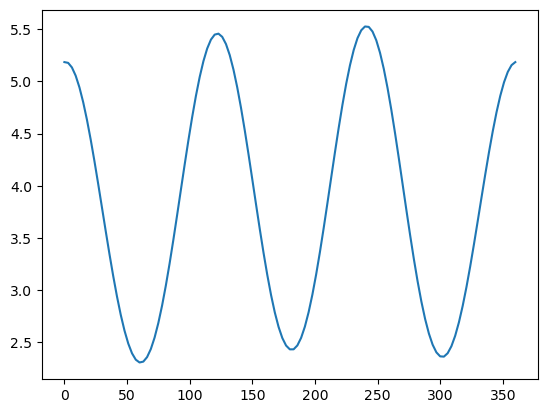

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate an array of energies for all comformers
energy_arr = []
angles = np.linspace(0, 360, num=121) # rotate 3 degrees each time
for angle in angles:
    energy_arr.append(calculate_total_energy(ethane_mol, angle))
energy_arr = np.array(energy_arr)
    
# Plot the result
plt.plot(angles, energy_arr)

### 2.2.4. Potential Energy

In molecular mechanics, the potential energy of a molecular system is described in terms of various energy components. These energy terms capture different aspects of molecular interactions and contribute to the overall potential energy. Below are descriptions of key energy terms, along with their corresponding equations for calculation.

The total energy of a molecular system is the sum of its bonded and non-bonded energies:

$$E_{\text{potential}} = E_{\text{bonded}} + E_{\text{non-bonded}}$$

Bonded energy accounts for the interactions associated with covalent bonds within the molecular structure. The bonded energy is the sum of these individual bonded energy terms:

$$E_{\text{bonded}} = E_{\text{bonds}} + E_{\text{angles}} + E_{\text{torsion}} + E_{\text{out of plane}} + E_{\text{inversion}} + E_{\text{cross}} + E_{\text{additional}}$$

Non-bonded energy encompasses interactions between atoms that are not directly connected by covalent bonds. The non-bonded energy is the sum of these individual non-bonded energy terms:

$$E_{\text{non-bonded}} = E_{\text{vdw}} + E_{\text{electrostatic}} + E_{\text{additional}}$$

#### 2.2.4.1. Bond Stretching Energy (E<sub>bonds</sub>)

Bond stretching energy accounts for the energy required to stretch or compress chemical bonds. It is calculated as follows:

$$E_{\text{bonds}} = \sum_k \frac{1}{2} k_b (r_k - r_{0})^2$$

Where:
- $k_b$ is the force constant of the bond.
- $r_k$ is the current bond length.
- $r_{0k}$ is the equilibrium bond length.

#### 2.2.4.2. Angle Bending Energy (E<sub>angles</sub>)

Angle bending energy represents the energy associated with bond angles within a molecule. It is calculated as follows:

$$E_{\text{angles}} = \sum_j \frac{1}{2} k_{\theta j} (\theta_j - \theta_{0})^2$$

Where:
- $k_{\theta j}$ is the force constant for angle \(j\).
- $\theta_j$ is the current bond angle.
- $\theta_{0j}$ is the equilibrium bond angle.

#### 2.2.4.3. Torsional Energy (E<sub>torsion</sub>)

Torsional energy accounts for the energy due to the rotation of bonds within a molecule. It is calculated as a sum of periodic terms:

$$E_{\text{torsion}} = \sum_{n=1}^{N} V_n [1 + \cos(n \phi - \gamma_n)]$$

Where:
- $N$ is the number of torsional terms.
- $V_n$ is the amplitude of the $n$-th term.
- $\phi$ is the dihedral angle.
- $\gamma_n$ is the phase offset of the $n$-th term.

#### 2.2.4.4. Out-of-Plane Bending Energy (E<sub>out of plane</sub>)


Out-of-plane bending energy accounts for the energy associated with deviations from a planar conformation. It is calculated based on the out-of-plane angle and force constants.

$$E_{\text{out of plane}} = \frac{1}{2} k_{\text{oop}} \Delta z^2$$

Where:
- $k_{\text{oop}}$ is the out-of-plane force constant.
- $\Delta z$ is the deviation from the planar conformation.

#### 2.2.4.5. Inversion (E<sub>inversion</sub>)

Inversion energy accounts for deviations from a planar arrangement of atoms, often seen in nitrogen inversion in amines. It is calculated based on inversion force constants.

$$E_{\text{inversion}} = \frac{1}{2} k_{\text{inv}} \Delta \theta^2$$

Where:
- $k_{\text{inv}}$ is the inversion force constant.
- $\Delta \theta$ is the deviation from the planar arrangement.

#### 2.2.4.6. Cross Term (E<sub>cross</sub>)

The cross term accounts for interactions between different types of energy terms, such as bond-stretching and angle-bending interactions, and is included in force fields to capture mixed interactions.

$$E_{\text{cross}} = \sum_{i} \sum_{j} E_{\text{cross}, ij}$$

Where:
- $E_{\text{cross}}$ represents the total cross term energy.
- $E_{\text{cross}, ij}$ represents the cross term energy between interactions of atom $i$ and atom $j$.

#### 2.2.4.7. Van der Waals Energy (E<sub>vdw</sub>)

Van der Waals energy represents the attractive and repulsive interactions between atoms. It is calculated using the Lennard-Jones potential:

$$E_{\text{vdw}} = \sum_i \sum_j \left(\frac{A_{ij}}{r_{ij}^{12}} - \frac{B_{ij}}{r_{ij}^{6}}\right)$$

Where:
- $A_{ij}$ and $B_{ij}$ are Lennard-Jones parameters for atom pairs $i$ and $j$).
- $r_{ij}$ is the distance between atoms $i$ and $j$.

#### 2.2.4.8. Electrostatic Energy (E<sub>electrostatic</sub>)

Electrostatic energy accounts for electrostatic interactions, such as charges, between atoms. It is calculated using the Coulombic potential energy:

$$E_{\text{electrostatic}} = \sum_i \sum_j \frac{q_i q_j}{4\pi\epsilon r_{ij}}$$

Where:
- $q_i$ and $q_j$ are the charges of atoms $i$ and $j$.
- $\epsilon$ is the dielectric constant.
- $r_{ij}$ is the distance between atoms $i$ and $j$.

#### 2.2.4.9. Additional Non-Bonded Terms (E<sub>additional</sub>)

Additional terms may be introduced in specific force fields to account for other molecular interactions (bonded and non-bonded), such as hydrogen bonding or solvation effects.

### 2.2.5. Geometry Optimization

Geometry optimization is a fundamental process in molecular mechanics that aims to find the most stable configuration (conformation) of a molecular system. This process involves adjusting the positions of atoms to minimize the potential energy of the system. Geometry optimization is crucial in understanding molecular structures, chemical reactions, and thermodynamic properties.

In molecular mechanics simulations, a molecular system is initially assigned a set of atomic coordinates. However, these coordinates may not correspond to the most stable or energetically favorable conformation. Geometry optimization seeks to find the conformation with the lowest potential energy, representing the most stable state of the system.

#### 2.2.5.1. Calculation of Energy Gradient

Geometry optimization relies on the calculation of the energy gradient $\nabla E$, a vector that points in the direction of the steepest increase in potential energy. It can be calculated for each atom and each coordinate (x, y, z). The energy gradient is used to determine how the potential energy changes as atomic coordinates are adjusted. The negative gradient represents the force acting on each atom.

The energy gradient for a given coordinate can be expressed as:

$$\nabla E_i = -\frac{\partial E}{\partial q_i}$$

Where:
- $\nabla E_i$ is the energy gradient for coordinate $q_i$.
- $\frac{\partial E}{\partial q_i}$ represents the partial derivative of the potential energy with respect to coordinate $q_i$.

#### 2.2.5.2. Minimizing the Energy Function with Gradient Descent


The gradient descent update for atomic coordinates is given by:

$$q_i^{(n+1)} = q_i^{(n)} - \alpha \nabla E_i^{(n)}$$

Where:
- $q_i^{(n+1)}$ is the updated coordinate for atom $i$ at iteration $n+1$.
- $q_i^{(n)}$ is the current coordinate for atom $i$ at iteration $n$.
- $\alpha$ is the step size (learning rate) that controls the step size in the direction of the negative gradient.
- $\nabla E_i^{(n)}$ is the energy gradient for coordinate $q_i$ at iteration $n$.

This iterative process continues until a local minimum is reached, where the energy gradient becomes nearly zero, indicating a stable conformation.

In the following section, we will optimize the geometry of a distorted cyclohexane molecule:

First, we optimize with UFF:

In [8]:
# Create an RDKit molecule from the XYZ string
cyclohexane_smiles = 'C1CCCCC1'
cyclohexane_mol = Chem.MolFromSmiles(cyclohexane_smiles)

# Prepare the molecule
cyclohexane_mol = Chem.AddHs(cyclohexane_mol)
AllChem.EmbedMolecule(cyclohexane_mol)

# Visualize the molecule with Py3DMol before optimization
View3DModel(cyclohexane_mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
# Generate a UFF force field object
uff = Chem.rdForceFieldHelpers.UFFGetMoleculeForceField(cyclohexane_mol)

# Calculate the energy total energy before optimization
total_energy = uff.CalcEnergy()
print(total_energy)

26.732977369515332


In [10]:
# Optimize the molecule
opt_result = Chem.rdForceFieldHelpers.UFFOptimizeMoleculeConfs(cyclohexane_mol, maxIters=100)

# Print out the optimized energy
print(opt_result[-1][1])

# Visualize the molecule with Py3DMol after optimization
View3DModel(cyclohexane_mol)

6.517950148176748


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Next, we will optimize glucose molecule with MMFF:

In [11]:
# Create an RDKit molecule from file
glucose_mol = Chem.MolFromPDBFile('.\\structures\\glucose.pdb')

# Prepare the molecule
glucose_mol = Chem.AddHs(glucose_mol)
AllChem.EmbedMolecule(glucose_mol)

# Visualize the molecule with Py3DMol before optimization
View3DModel(glucose_mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [12]:
# Generate a MMFF force field object
mol_properties = Chem.rdForceFieldHelpers.MMFFGetMoleculeProperties(glucose_mol)
mmff = Chem.rdForceFieldHelpers.MMFFGetMoleculeForceField(glucose_mol, mol_properties)

# Calculate the energy total energy before optimization
total_energy = mmff.CalcEnergy()
print(total_energy)

127.25381018693749


In [13]:
# Optimize the molecule
opt_result = Chem.rdForceFieldHelpers.MMFFOptimizeMoleculeConfs(glucose_mol, maxIters=100)

# Print out the optimized energy
print(opt_result[-1][1])

# Visualize the molecule with Py3DMol after optimization
View3DModel(glucose_mol)

93.63339665309343


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

If you want to log the energy value and geometry for each optimization step, you can run a loop:

In [14]:
# Create an RDKit molecule from file
glucose_mol = Chem.MolFromPDBFile('.\\structures\\glucose.pdb')

# Prepare the molecule
glucose_mol = Chem.AddHs(glucose_mol)
AllChem.EmbedMolecule(glucose_mol)

# Geometry optimization
max_steps = 100
steps = 5 # save geometry every 5 steps
energy_values = []
geometries = []
for i in range(max_steps // steps):
    # Optimize the molecule
    opt_result = Chem.rdForceFieldHelpers.MMFFOptimizeMoleculeConfs(glucose_mol, maxIters=steps)

    # Add the energy value to the list
    energy_values.append(opt_result[-1][1])
    
    # Add the geometry to the list
    geometries.append(Chem.MolToPDBBlock(glucose_mol))

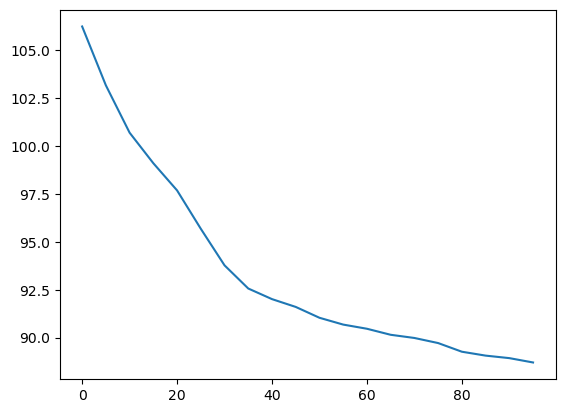

In [15]:
# Show energy plot
import matplotlib.pyplot as plt

plt.plot(np.array(range(len(energy_values)))*steps,energy_values)

In [16]:
# Show geometry
geo_idx = 10
view = py3Dmol.view(width=400, height=300)
view.addModel(geometries[geo_idx], "molecule", {'keepH': True})
view.setBackgroundColor('white')
view.setStyle({'stick': {'scale': 0.3}, 'sphere': {'scale': 0.3}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
# Define a function to generate a PDB trajectory
def generate_pdb_trajectory(geometries):
    # Initialize the trajectory string
    trajectory = ""
        
    # Loop over the list of geometries and generate the corresponding PDB format
    for idx in range(len(geometries)):            
        # Add the records for atoms
        trajectory += "MODEL     {:4d}\n".format(idx + 1)
        trajectory += geometries[idx]
        trajectory += "ENDMDL\n"

    return trajectory

In [18]:
# Generate the PDB trajectory string
pdb_trajectory = generate_pdb_trajectory(geometries)

In [19]:
# Show the animation
view = py3Dmol.view(width=400, height=300)
view.addModelsAsFrames(pdb_trajectory, "trajectory", {'keepH': True})
view.setBackgroundColor('white')
view.setStyle({'stick': {'scale': 0.3}, 'sphere': {'scale': 0.3}})
view.zoomTo()
view.animate({'loop': "forward", 'interval': 10}) # Adjust the speed as needed (set 'interval' to a new value in millisecond)
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.